In [1]:
import pandas as pd ;
import matplotlib.pyplot as plt ;
import seaborn as sns ;
import numpy as np ;

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.rename( columns = {'Annual Income (k$)' : 'Annual_Income' , 'Spending Score (1-100)' : 'Spending_Score' } , inplace = True )

In [5]:
df.head()

,CustomerID,Genre,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.drop( columns = ['Genre','Age','CustomerID'] , inplace = True )
df.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
# x = df.iloc[:,3:]
# x.head()

<Axes: title={'center': 'Unclustered data'}, xlabel='Annual Income', ylabel='Spending Score'>

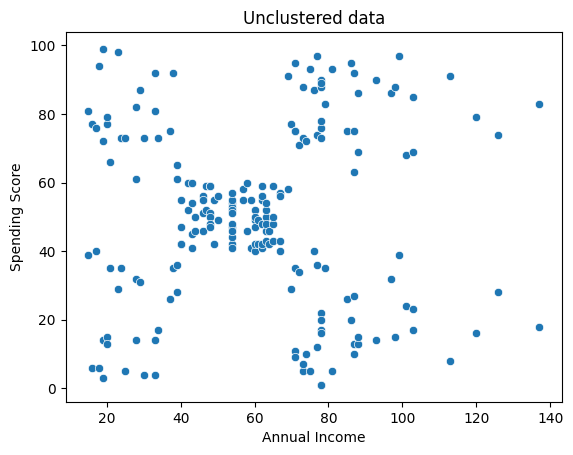

In [8]:
plt.title("Unclustered data")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
# plt.scatter(df['Annual_Income'],df['Spending_Score'])
# plt.show()
sns.scatterplot(data=df,x='Annual_Income',y='Spending_Score')

In [9]:
from sklearn.cluster import KMeans , AgglomerativeClustering

In [10]:
kmeans = KMeans ( n_clusters = 3 , random_state = 0 )

In [11]:
kmeans.fit_predict(df[['Spending_Score']])

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [12]:
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

In [13]:
centroids = kmeans.cluster_centers_
centroids

array([[44.15447154, 49.82926829],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895]])

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

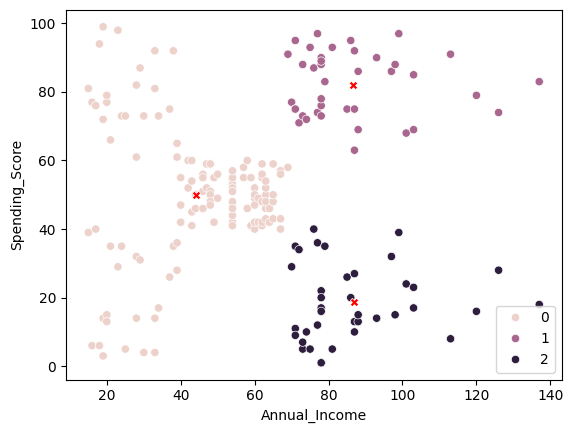

In [14]:
cent_x = [centroids[0][0],centroids[1][0],centroids[2][0]]
cent_y = [centroids[0][1],centroids[1][1],centroids[2][1]]
sns.scatterplot(data = df , x = 'Annual_Income' , y = 'Spending_Score' , hue = kmeans.labels_ )
sns.scatterplot( x = cent_x , y = cent_y , marker = 'X' , color = 'red' )

In [15]:
kmeans.inertia_

106348.37306211122

In [16]:
sse = [] 
for k in range(1,16) :
    km = KMeans( n_clusters = k ) 
    km.fit_predict(df[['Spending_Score']])
    sse.append( km.inertia_ )

In [17]:
from sklearn.metrics import silhouette_score
silh = [] 
x = df 
for k in range(2,16) :
    km = KMeans( n_clusters = k ) 
    labels = km.fit_predict(x)
    score = silhouette_score(x,labels)
    silh.append( score )

In [18]:
silh

[0.39564531743995546,
 0.46761358158775435,
 0.4937945814354117,
 0.553931997444648,
 0.4560606038675267,
 0.4537173684163333,
 0.44328934775933754,
 0.44738326133302453,
 0.4066184194724224,
 0.4250752772176233,
 0.42891800166700766,
 0.4265561191621135,
 0.3980182684475588,
 0.40998405048837755]

In [19]:
sse

[132703.99999999997,
 46936.479166666664,
 13929.293591518917,
 9003.686407354275,
 5161.663758460419,
 3448.763661177586,
 2592.7855795114174,
 2158.9844401974833,
 1719.6502978917633,
 1419.9960961452343,
 1085.9629983212203,
 910.989367117342,
 778.4028850535431,
 714.3778138528136,
 593.9020573380869]

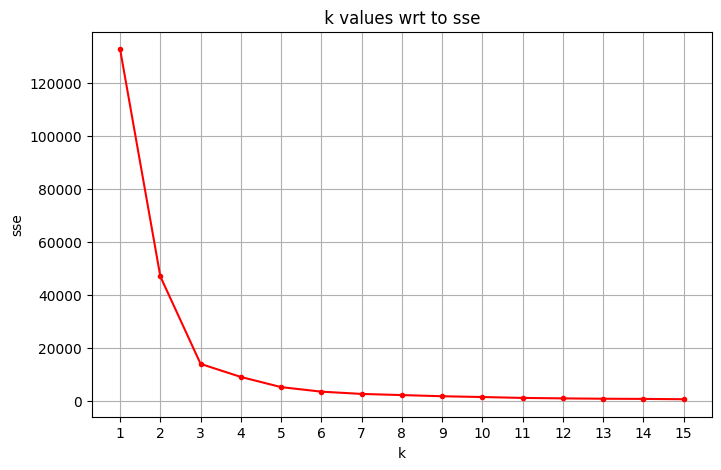

In [20]:
plt.figure( figsize=(8,5) )
plt.title( " k values wrt to sse " )
plt.xlabel ( "k" )
plt.ylabel( "sse" )
plt.grid()
plt.xticks( range(1,16) )
plt.plot( range(1,16) , sse , marker = '.' , color = 'red' )

In [21]:
new_kmean = KMeans( n_clusters = 5 , random_state = 0 )
new_kmean.fit_predict( df[['Spending_Score']] )
new_kmean.fit(df)

KMeans(n_clusters=5, random_state=0)

In [22]:
new_centroid = new_kmean.cluster_centers_
new_centroid

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

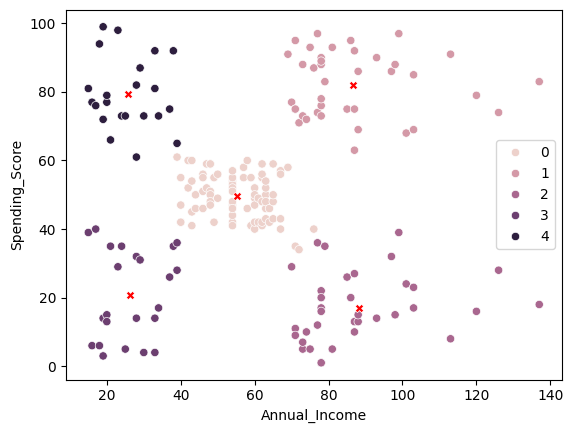

In [23]:
# new_cent_x = [new_centroid[0][0],new_centroid[1][0],new_centroid[2][0],new_centroid[3][0],new_centroid[4][0]]
# new_cent_y = [new_centroid[0][1],new_centroid[1][1],new_centroid[2][1],new_centroid[3][1],new_centroid[4][1]]
# sns.scatterplot (  x = new_cent_x , y = new_cent_y , marker = 'X' , color = 'red' )

sns.scatterplot ( data = df , x = df['Annual_Income'] , y = df['Spending_Score'] , hue = new_kmean.labels_ )
sns.scatterplot ( x = new_centroid[:,0] , y = new_centroid[:,1] , marker = 'X' , color = 'red' )

In [24]:
predict_cluster = new_kmean.predict( [[40,25]] )
print("predict_cluster : ", predict_cluster[0])

predict_cluster :  3


C:\Users\Kiran Navale\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


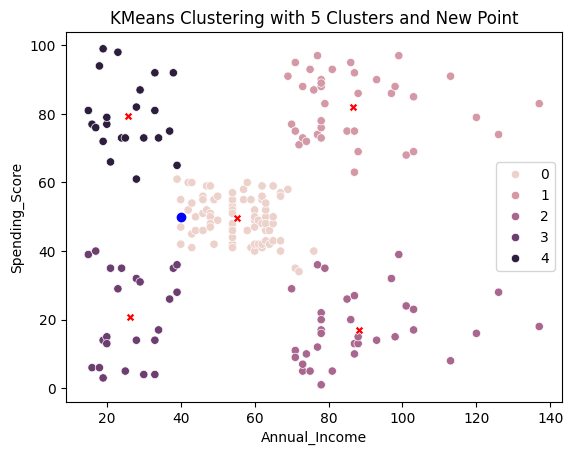

In [36]:
sns.scatterplot ( data = df , x = df['Annual_Income'] , y = df['Spending_Score'] , hue = new_kmean.labels_ )
sns.scatterplot ( x = new_centroid[:,0] , y = new_centroid[:,1] , marker = 'X' , color = 'red' )
plt.plot( 40, 50 , 'o' , c = 'blue' )
plt.title("KMeans Clustering with 5 Clusters and New Point")
plt.show()

In [30]:
from scipy.cluster.hierarchy import dendrogram , linkage 
from sklearn.cluster import AgglomerativeClustering

In [33]:
agglo = AgglomerativeClustering( n_clusters = 5 , linkage = 'ward' , metric = 'euclidean' )
agglo.fit_predict(df)
agglo.fit(df)

AgglomerativeClustering(n_clusters=5)

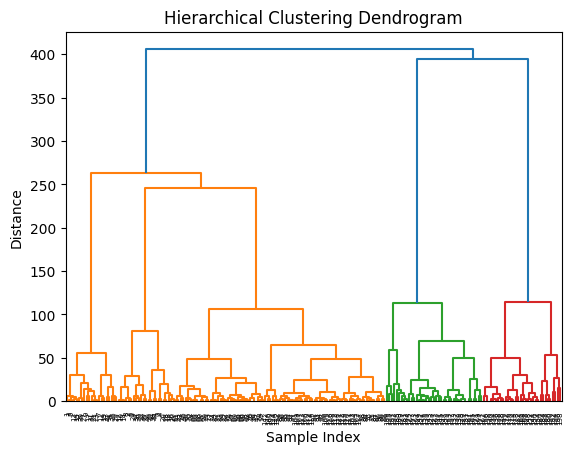

In [28]:
linkage_matrix = linkage( df , method = 'ward' )
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()